In [1]:
import config
import utils
import model

from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

hidden_units = [256, 256]
learning_rate = 0.005
dropout_rate = 0.2
num_epochs = 150
batch_size = 128

Num_sensors = 16
num_classes = 53
path = 'C:/Users/hml76/Desktop/Jupyter/Paper1__renew/Github/Ninapro/'
lr_scheduler = LearningRateScheduler(model.step_decay, verbose=1)

## Ninapro EMG Gesture Recognition Dataset: K-Nearest Neighbor (K=1) Structure

In [2]:
data_processor = utils.build_data(path, Num_sensors)
#data_processor.data_save()

EMG_dataframe = utils.call_data(path)
Node_feature, X_train, y_train, X_test, y_test = utils.data_split(EMG_dataframe, ratio=0.2) #test ratio

Train data shape: (34162, 401)
Test data shape: (8558, 401)


In [3]:
graph_generator = config.Graph_Ninapro(EMG_dataframe, Num_sensors)

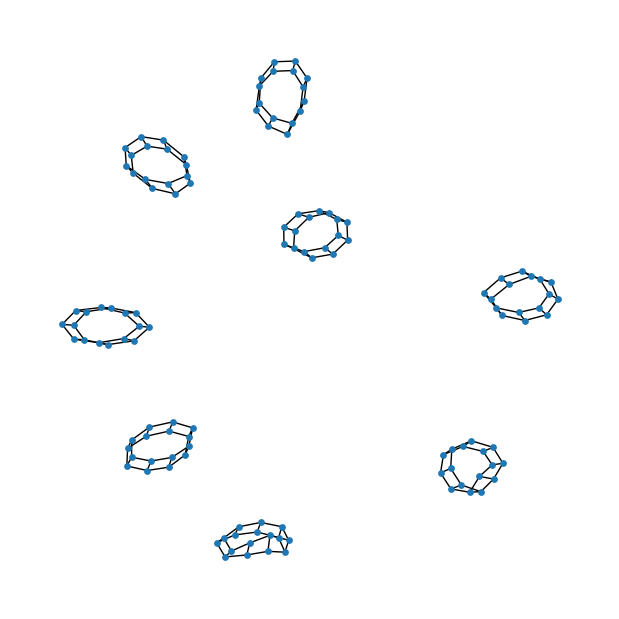

In [4]:
graph, edges, edge_weights = graph_generator.KNN1()
graph_generator.draw_graph(graph[:192])

In [5]:
graph, edges, edge_weights = graph_generator.KNN1()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/150
267/267 [==============================] - 41s 143ms/step - loss: 3.8760 - acc: 0.0658 - val_loss: 3.8416 - val_acc: 0.0614 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/150
267/267 [==============================] - 38s 142ms/step - loss: 3.6875 - acc: 0.0798 - val_loss: 3.7314 - val_acc: 0.0718 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/150
267/267 [==============================] - 38s 142ms/step - loss: 3.6001 - acc: 0.0889 - val_loss: 3.6128 - val_acc: 0.0876 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/150
267/267 [==============================] - 38s 142ms/step - loss: 3.5167 - acc: 0.0972 - val_loss: 3.5539 - val_acc: 0.0926 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/150
267/267 [==============================] - 38s 142ms/step - loss: 3.4250 - ac

Epoch 39/150
267/267 [==============================] - 38s 142ms/step - loss: 1.8742 - acc: 0.3875 - val_loss: 1.6187 - val_acc: 0.4561 - lr: 0.0080

Epoch 40: LearningRateScheduler setting learning rate to 0.008.
Epoch 40/150
267/267 [==============================] - 38s 142ms/step - loss: 1.8539 - acc: 0.3925 - val_loss: 1.6265 - val_acc: 0.4476 - lr: 0.0080

Epoch 41: LearningRateScheduler setting learning rate to 0.006.
Epoch 41/150
267/267 [==============================] - 38s 142ms/step - loss: 1.8014 - acc: 0.4096 - val_loss: 1.5418 - val_acc: 0.4692 - lr: 0.0060

Epoch 42: LearningRateScheduler setting learning rate to 0.006.
Epoch 42/150
267/267 [==============================] - 38s 142ms/step - loss: 1.7642 - acc: 0.4201 - val_loss: 1.3093 - val_acc: 0.5602 - lr: 0.0060

Epoch 43: LearningRateScheduler setting learning rate to 0.006.
Epoch 43/150
267/267 [==============================] - 38s 142ms/step - loss: 1.7320 - acc: 0.4285 - val_loss: 1.3255 - val_acc: 0.5524 - l

267/267 [==============================] - 38s 142ms/step - loss: 1.3209 - acc: 0.5708 - val_loss: 0.8224 - val_acc: 0.7493 - lr: 0.0040

Epoch 78: LearningRateScheduler setting learning rate to 0.004.
Epoch 78/150
267/267 [==============================] - 38s 142ms/step - loss: 1.2978 - acc: 0.5746 - val_loss: 0.8704 - val_acc: 0.7139 - lr: 0.0040

Epoch 79: LearningRateScheduler setting learning rate to 0.004.
Epoch 79/150
267/267 [==============================] - 38s 142ms/step - loss: 1.3051 - acc: 0.5770 - val_loss: 0.8267 - val_acc: 0.7493 - lr: 0.0040

Epoch 80: LearningRateScheduler setting learning rate to 0.004.
Epoch 80/150
267/267 [==============================] - 38s 142ms/step - loss: 1.3007 - acc: 0.5742 - val_loss: 0.8171 - val_acc: 0.7564 - lr: 0.0040

Epoch 81: LearningRateScheduler setting learning rate to 0.002.
Epoch 81/150
267/267 [==============================] - 38s 142ms/step - loss: 1.2622 - acc: 0.5896 - val_loss: 0.7956 - val_acc: 0.7468 - lr: 0.0020

Ep

267/267 [==============================] - 38s 142ms/step - loss: 1.1065 - acc: 0.6412 - val_loss: 0.6244 - val_acc: 0.8045 - lr: 0.0020

Epoch 116: LearningRateScheduler setting learning rate to 0.002.
Epoch 116/150
267/267 [==============================] - 38s 142ms/step - loss: 1.0994 - acc: 0.6442 - val_loss: 0.6331 - val_acc: 0.8008 - lr: 0.0020

Epoch 117: LearningRateScheduler setting learning rate to 0.002.
Epoch 117/150
267/267 [==============================] - 38s 142ms/step - loss: 1.0894 - acc: 0.6482 - val_loss: 0.5746 - val_acc: 0.8243 - lr: 0.0020

Epoch 118: LearningRateScheduler setting learning rate to 0.002.
Epoch 118/150
267/267 [==============================] - 38s 142ms/step - loss: 1.0957 - acc: 0.6492 - val_loss: 0.6008 - val_acc: 0.8147 - lr: 0.0020

Epoch 119: LearningRateScheduler setting learning rate to 0.002.
Epoch 119/150
267/267 [==============================] - 38s 142ms/step - loss: 1.1032 - acc: 0.6451 - val_loss: 0.5786 - val_acc: 0.8200 - lr: 0.

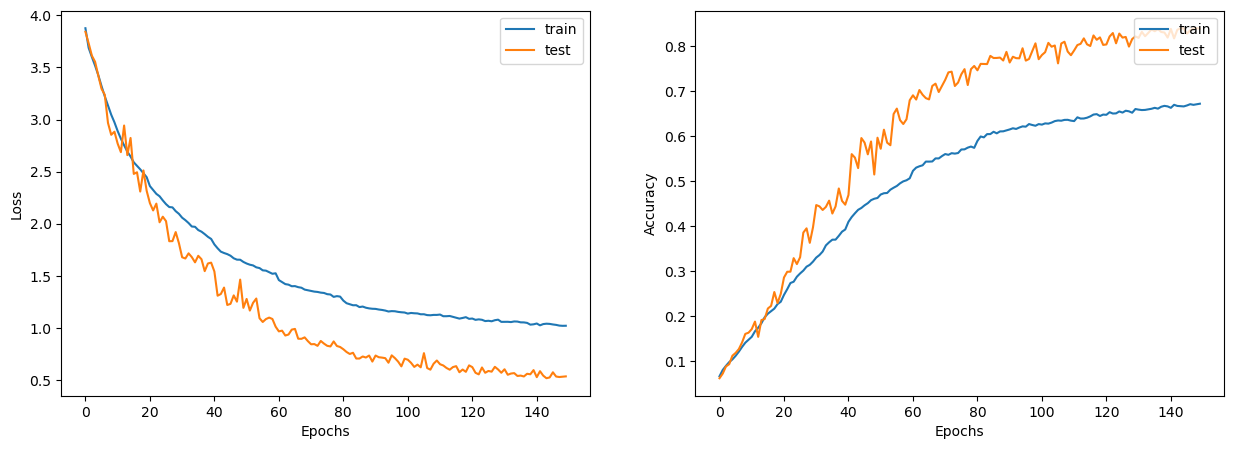

(None, 0.840419352054596)

In [6]:
utils.display_learning_curves(history), max(history.history['val_acc'])

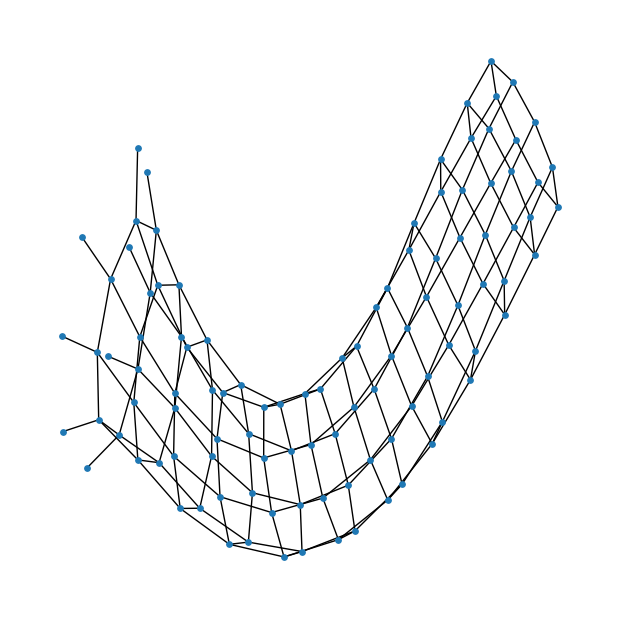

In [7]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_generator.draw_graph(graph[:192])

In [9]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
267/267 [==============================] - 45s 161ms/step - loss: 3.8510 - acc: 0.0671 - val_loss: 3.9486 - val_acc: 0.0294 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
267/267 [==============================] - 42s 159ms/step - loss: 3.6028 - acc: 0.0833 - val_loss: 3.6935 - val_acc: 0.0716 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
267/267 [==============================] - 42s 159ms/step - loss: 3.4769 - acc: 0.0935 - val_loss: 3.3592 - val_acc: 0.1025 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
267/267 [==============================] - 42s 159ms/step - loss: 3.3699 - acc: 0.1056 - val_loss: 3.3048 - val_acc: 0.1093 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
267/267 [==============================] - 42s 159ms/step - loss: 3.2338 - ac

Epoch 39/200
267/267 [==============================] - 42s 159ms/step - loss: 1.7729 - acc: 0.4026 - val_loss: 1.5346 - val_acc: 0.4790 - lr: 0.0080

Epoch 40: LearningRateScheduler setting learning rate to 0.008.
Epoch 40/200
267/267 [==============================] - 42s 159ms/step - loss: 1.7377 - acc: 0.4150 - val_loss: 1.4395 - val_acc: 0.5045 - lr: 0.0080

Epoch 41: LearningRateScheduler setting learning rate to 0.006.
Epoch 41/200
267/267 [==============================] - 42s 159ms/step - loss: 1.6753 - acc: 0.4351 - val_loss: 1.3076 - val_acc: 0.5584 - lr: 0.0060

Epoch 42: LearningRateScheduler setting learning rate to 0.006.
Epoch 42/200
267/267 [==============================] - 42s 159ms/step - loss: 1.6485 - acc: 0.4441 - val_loss: 1.3034 - val_acc: 0.5598 - lr: 0.0060

Epoch 43: LearningRateScheduler setting learning rate to 0.006.
Epoch 43/200
267/267 [==============================] - 42s 159ms/step - loss: 1.6054 - acc: 0.4555 - val_loss: 1.2949 - val_acc: 0.5637 - l

267/267 [==============================] - 42s 158ms/step - loss: 1.1338 - acc: 0.6251 - val_loss: 0.7728 - val_acc: 0.7501 - lr: 0.0040

Epoch 78: LearningRateScheduler setting learning rate to 0.004.
Epoch 78/200
267/267 [==============================] - 42s 158ms/step - loss: 1.1235 - acc: 0.6258 - val_loss: 0.6968 - val_acc: 0.7833 - lr: 0.0040

Epoch 79: LearningRateScheduler setting learning rate to 0.004.
Epoch 79/200
267/267 [==============================] - 42s 158ms/step - loss: 1.1236 - acc: 0.6257 - val_loss: 0.8297 - val_acc: 0.7246 - lr: 0.0040

Epoch 80: LearningRateScheduler setting learning rate to 0.004.
Epoch 80/200
267/267 [==============================] - 42s 158ms/step - loss: 1.1094 - acc: 0.6365 - val_loss: 0.6707 - val_acc: 0.7913 - lr: 0.0040

Epoch 81: LearningRateScheduler setting learning rate to 0.002.
Epoch 81/200
267/267 [==============================] - 42s 158ms/step - loss: 1.0722 - acc: 0.6445 - val_loss: 0.6279 - val_acc: 0.7997 - lr: 0.0020

Ep

267/267 [==============================] - 42s 158ms/step - loss: 0.9211 - acc: 0.6983 - val_loss: 0.4490 - val_acc: 0.8673 - lr: 0.0020

Epoch 116: LearningRateScheduler setting learning rate to 0.002.
Epoch 116/200
267/267 [==============================] - 42s 158ms/step - loss: 0.9084 - acc: 0.7031 - val_loss: 0.4906 - val_acc: 0.8479 - lr: 0.0020

Epoch 117: LearningRateScheduler setting learning rate to 0.002.
Epoch 117/200
267/267 [==============================] - 42s 158ms/step - loss: 0.9112 - acc: 0.7031 - val_loss: 0.4433 - val_acc: 0.8663 - lr: 0.0020

Epoch 118: LearningRateScheduler setting learning rate to 0.002.
Epoch 118/200
267/267 [==============================] - 42s 158ms/step - loss: 0.8935 - acc: 0.7042 - val_loss: 0.4395 - val_acc: 0.8658 - lr: 0.0020

Epoch 119: LearningRateScheduler setting learning rate to 0.002.
Epoch 119/200
267/267 [==============================] - 42s 158ms/step - loss: 0.8947 - acc: 0.7047 - val_loss: 0.4350 - val_acc: 0.8680 - lr: 0.

Epoch 153/200
267/267 [==============================] - 42s 158ms/step - loss: 0.8126 - acc: 0.7339 - val_loss: 0.3882 - val_acc: 0.8825 - lr: 0.0020

Epoch 154: LearningRateScheduler setting learning rate to 0.002.
Epoch 154/200
267/267 [==============================] - 42s 158ms/step - loss: 0.8135 - acc: 0.7375 - val_loss: 0.4175 - val_acc: 0.8697 - lr: 0.0020

Epoch 155: LearningRateScheduler setting learning rate to 0.002.
Epoch 155/200
267/267 [==============================] - 42s 158ms/step - loss: 0.8120 - acc: 0.7368 - val_loss: 0.3497 - val_acc: 0.9018 - lr: 0.0020

Epoch 156: LearningRateScheduler setting learning rate to 0.002.
Epoch 156/200
267/267 [==============================] - 42s 158ms/step - loss: 0.8060 - acc: 0.7421 - val_loss: 0.3931 - val_acc: 0.8785 - lr: 0.0020

Epoch 157: LearningRateScheduler setting learning rate to 0.002.
Epoch 157/200
267/267 [==============================] - 42s 158ms/step - loss: 0.7913 - acc: 0.7428 - val_loss: 0.3364 - val_acc: 0

Epoch 191/200
267/267 [==============================] - 42s 158ms/step - loss: 0.7417 - acc: 0.7613 - val_loss: 0.2984 - val_acc: 0.9123 - lr: 0.0020

Epoch 192: LearningRateScheduler setting learning rate to 0.002.
Epoch 192/200
267/267 [==============================] - 42s 158ms/step - loss: 0.7182 - acc: 0.7686 - val_loss: 0.3116 - val_acc: 0.9056 - lr: 0.0020

Epoch 193: LearningRateScheduler setting learning rate to 0.002.
Epoch 193/200
267/267 [==============================] - 42s 158ms/step - loss: 0.7150 - acc: 0.7701 - val_loss: 0.2844 - val_acc: 0.9161 - lr: 0.0020

Epoch 194: LearningRateScheduler setting learning rate to 0.002.
Epoch 194/200
267/267 [==============================] - 42s 158ms/step - loss: 0.7103 - acc: 0.7736 - val_loss: 0.2750 - val_acc: 0.9196 - lr: 0.0020

Epoch 195: LearningRateScheduler setting learning rate to 0.002.
Epoch 195/200
267/267 [==============================] - 42s 158ms/step - loss: 0.7137 - acc: 0.7722 - val_loss: 0.2983 - val_acc: 0

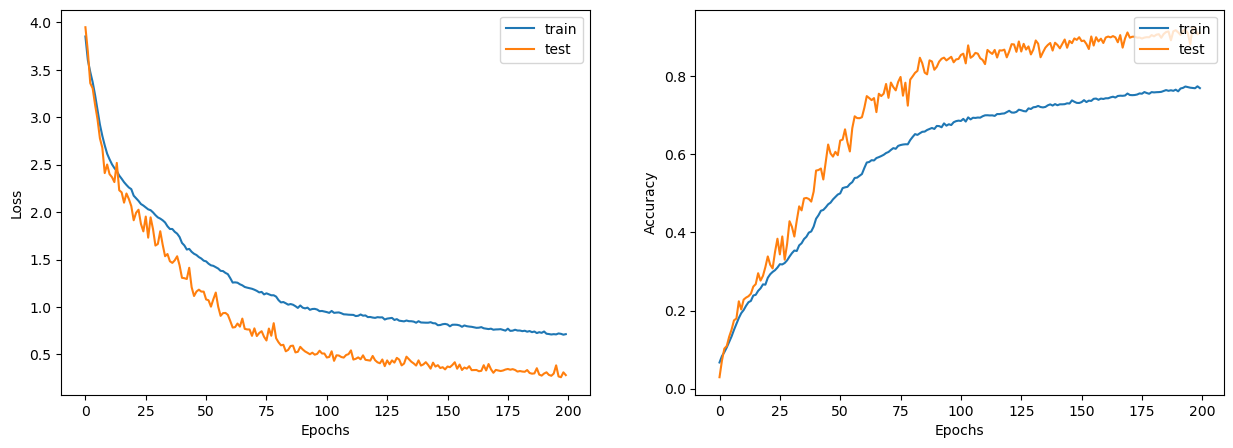

(None, 0.925451397895813)

In [10]:
utils.display_learning_curves(history), max(history.history['val_acc'])

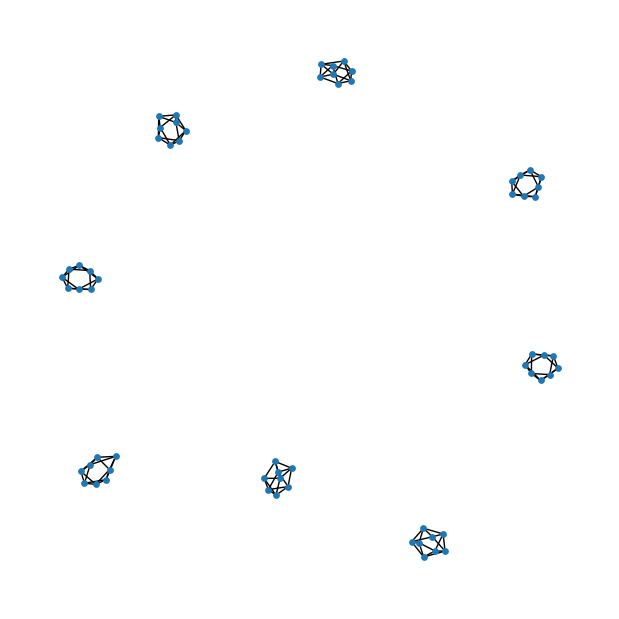

In [11]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_generator.draw_graph(graph[:192])

In [5]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
268/268 [==============================] - 72s 255ms/step - loss: 3.8340 - acc: 0.0691 - val_loss: 3.9477 - val_acc: 0.0307 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
268/268 [==============================] - 72s 268ms/step - loss: 3.4975 - acc: 0.0943 - val_loss: 3.5836 - val_acc: 0.0656 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
268/268 [==============================] - 73s 273ms/step - loss: 3.2524 - acc: 0.1126 - val_loss: 3.1724 - val_acc: 0.1105 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
268/268 [==============================] - 74s 277ms/step - loss: 2.9925 - acc: 0.1392 - val_loss: 3.1212 - val_acc: 0.1179 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
268/268 [==============================] - 76s 285ms/step - loss: 2.7372 - ac

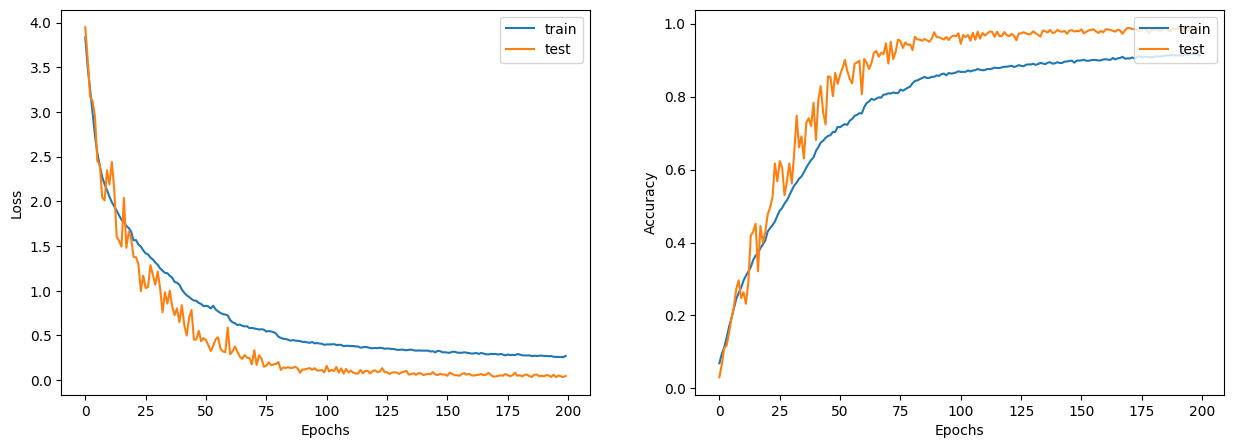

(None, 0.9902604818344116)

In [6]:
utils.display_learning_curves(history), max(history.history['val_acc'])

In [7]:
import gc
gc.collect()

9669

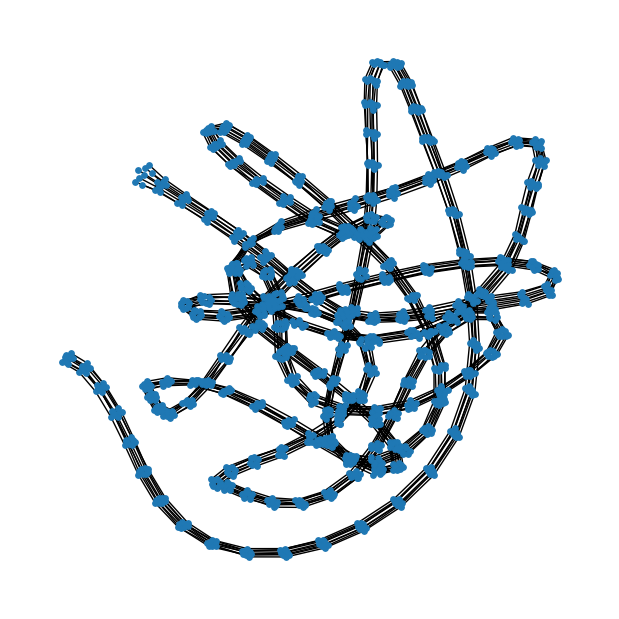

In [12]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_generator.draw_graph(graph[:5920])

In [6]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=150,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/150
267/267 [==============================] - 81s 287ms/step - loss: 3.8192 - acc: 0.0698 - val_loss: 3.9292 - val_acc: 0.0297 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/150
267/267 [==============================] - 78s 291ms/step - loss: 3.4163 - acc: 0.0970 - val_loss: 3.7141 - val_acc: 0.0372 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/150
267/267 [==============================] - 80s 299ms/step - loss: 3.1383 - acc: 0.1189 - val_loss: 2.9963 - val_acc: 0.1287 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/150
267/267 [==============================] - 83s 310ms/step - loss: 2.8688 - acc: 0.1495 - val_loss: 2.9959 - val_acc: 0.1256 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/150
267/267 [==============================] - 81s 303ms/step - loss: 2.5727 - ac

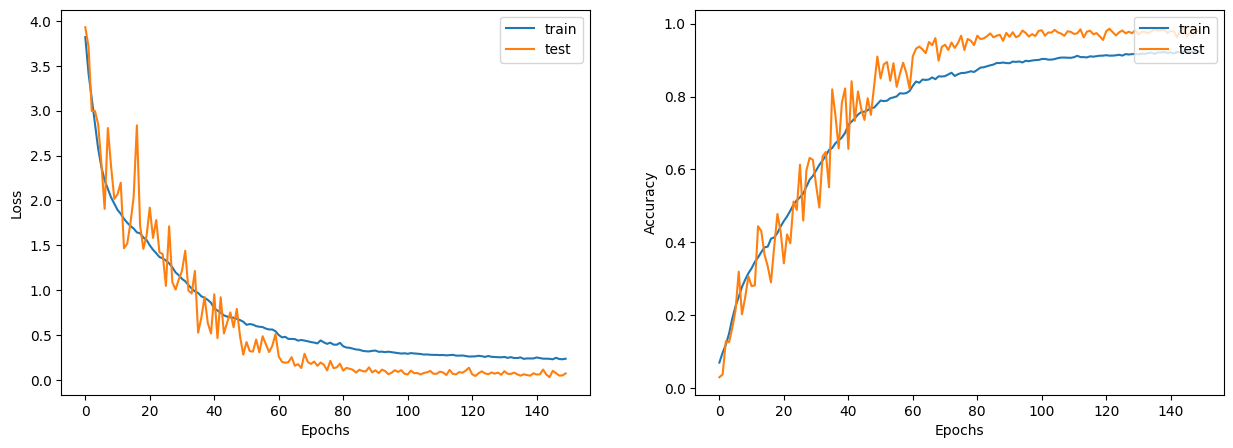

(None, 0.9903014898300171)

In [7]:
utils.display_learning_curves(history), max(history.history['val_acc'])

In [8]:
import gc
gc.collect()

9413

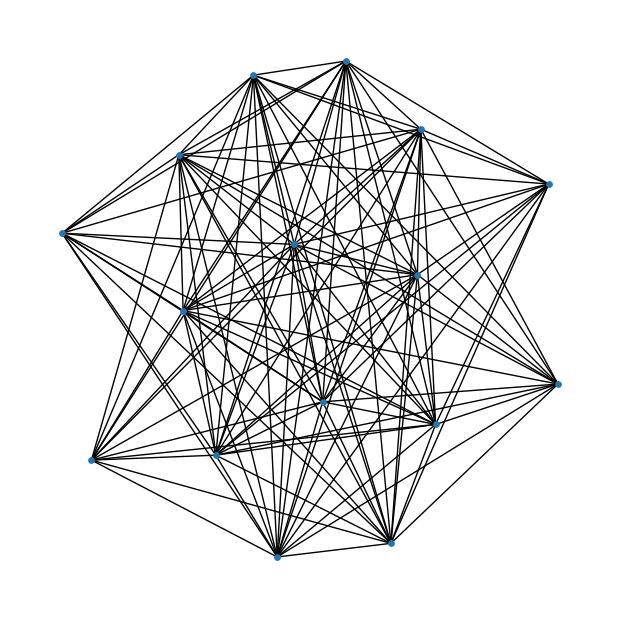

In [9]:
graph, edges, edge_weights = graph_generator.FC()
graph_generator.draw_graph(graph[:192])

In [ ]:
graph, edges, edge_weights = graph_generator.FC()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=150,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

In [ ]:
utils.display_learning_curves(history), max(history.history['val_acc'])

In [ ]:
import gc
gc.collect()

In [ ]:
graph, edges, edge_weights = graph_generator.FC_SW()
graph_generator.draw_graph(graph[:192])

In [ ]:
graph, edges, edge_weights = graph_generator.FC_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

In [ ]:
utils.display_learning_curves(history), max(history.history['val_acc'])

In [ ]:
import gc
gc.collect()

## UCI EMG Gesture Recognition Dataset: K-Nearest Neighbor + SW (K=1) Structure

In [ ]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_generator.draw_graph(graph[:1980])
#graph_generator.draw_graph(graph[:6200])

In [ ]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

In [ ]:
utils.display_learning_curves(history), max(history.history['val_acc'])

## UCI EMG Gesture Recognition Dataset: K-Nearest Neighbor Structure (K=2)

In [ ]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_generator.draw_graph(graph[:100])

In [ ]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

In [ ]:
utils.display_learning_curves(history)

## UCI EMG Gesture Recognition Dataset: K-Nearest Neighbor + Sensor-Wise Structure (K=2) 

In [ ]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_generator.draw_graph(graph)

In [ ]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

In [ ]:
utils.display_learning_curves(history)

## UCI EMG Gesture Recognition Dataset: Fully Connected Structure (FC)

In [ ]:
graph, edges, edge_weights = graph_generator.FC()
graph_generator.draw_graph(graph[:28])

In [ ]:
graph, edges, edge_weights = graph_generator.FC()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="FC_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

In [ ]:
utils.display_learning_curves(history)

## UCI EMG Gesture Recognition Dataset: Fully Connected & Sensor-Wise Structure (FC+SW)

In [ ]:
graph, edges, edge_weights = graph_generator.FC_SW()
graph_generator.draw_graph(graph)

In [ ]:
graph, edges, edge_weights = graph_generator.FC_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="FC_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

In [ ]:
utils.display_learning_curves(history), max(history.history['val_acc'])